In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib as mpl
# mpl.use('Agg')
from matplotlib import pyplot as plt

from viz_helpers import COLOR_BLUE, COLOR_WHITE, COLOR_YELLOW, COLOR_ORANGE, COLOR_GREEN, COLOR_PINK, set_cycler


In [4]:
plt.style.use('paper')

import matplotlib.pyplot as plt

def plot_query_legend(output):

    appearance_configs = [
        (COLOR_BLUE, 's', 20), (COLOR_YELLOW, 'o', 20), (COLOR_ORANGE, '^', 20), 
        (COLOR_GREEN, 'p', 20), (COLOR_WHITE, 'o', 10)
    ]
    labels = ['observed infected', 'hidden infected', 'query', 'source', 'hidden uninfected']

    handles = []
    for config in appearance_configs:
        color, shape, size = config
        h = plt.plot([],[],marker=shape, color=color, 
                     markersize=size,
                     ls="none")[0]
        handles.append(h)

    legend = plt.legend(handles, labels, loc=2,
                        framealpha=1, frameon=False,
                        ncol=3,
                        numpoints=1)
    plt.axis('off')
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(output, dpi="figure", bbox_inches=bbox)
# plt.show()

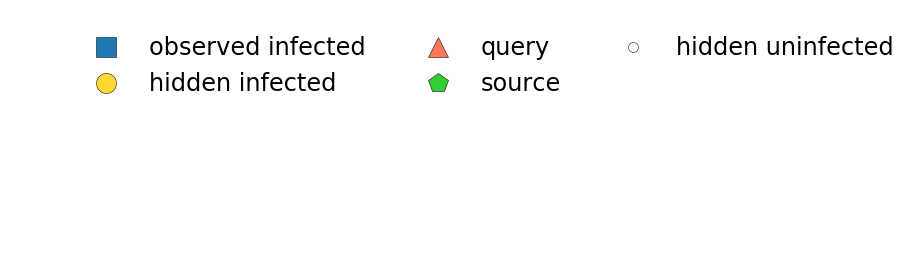

In [6]:
outputs = ['figs/inspect-query-process/legend.pdf',
           'figs/intro/legend.pdf']
for o in outputs:
    plot_query_legend(o)

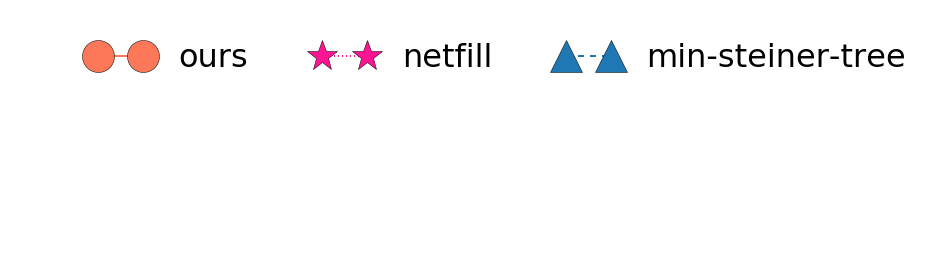

In [6]:
plt.style.use('paper')
ax = plt.subplot()
set_cycler(ax)
# method_configs = [
#     (COLOR_ORANGE, 'o', '-'),
#     (COLOR_PINK, '*', ':'), 
#     (COLOR_BLUE, '^', '--'), 
#     (COLOR_GREEN, 'v', '-.'), 
#     (COLOR_YELLOW, 's', '-')
# ]
labels = ['ours', 'netfill', 'min-steiner-tree']
size = 32
handles = []
# for config in method_configs:
for label in labels:
    if False:
        color, shape, linestyle = config
        h = ax.plot([],[], marker=shape, color=color,                  
                     linestyle=linestyle,
                     markersize=size)[0]
    else:
        h = ax.plot([], [], markersize=size)[0]
    handles.append(h)

legend = ax.legend(handles, labels, loc=2,
                   framealpha=1, frameon=False,
                   fontsize=32,
                   ncol=3)
ax.axis('off')
fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('figs/method_legend.pdf', dpi="figure", bbox_inches=bbox)